### **MNIST DIGIT RECOGNITION**

In [1]:
from keras.datasets import  mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [2]:
print(X_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [3]:
mnist.load_data 

<function keras.datasets.mnist.load_data(path='mnist.npz')>

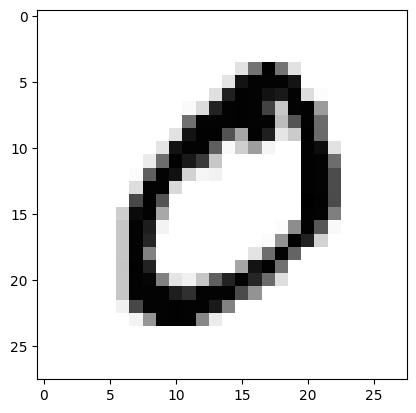

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1],cmap = plt.cm.Greys)

In [5]:
#the shape of each image is 
#print the shape of first image from train dataset 
#default shape of evrry image is 28 x 28
X_train[1].shape

(28, 28)

In [6]:
#getting dimensions of train and test data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# we have to reshape the train and test data as 4D tensor
#Dimensions no  of images x h x w x d(1)
#we have single channel so takan 1
# if there was RGB coloured image then we'd have 3 channels
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

input_shape = (28,28,1) 
#for one image

In [8]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# we convert the class labels t binary class matrices
from keras.utils.np_utils import to_categorical
# one hot code target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### **Build model using CNN -A simple CNN**
- Sequential Layer is easiest way to build model in keras, it allows you build model layer by layer
- use add() function to add layers to te model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [46]:
# #initialize empty model object

model = Sequential()
# 1. add Convolution layer
#     64 neurons in this layer
#     filter size is 4x4
#     activation function is 'relu'
#     each image size is 28x28x1

model.add(Conv2D(filters = 64,
                 kernel_size = 4,
                 activation  ='relu',
                 input_shape =(28,28,1))) # 1 because shape of image is 1
# 2. add maxpooling layer
# pool size is 2x2
model.add(MaxPooling2D(pool_size=(3,3)))
# 3. add fully connected layer, before that flatten the output of maxpool

# 10 neurons in th output layer, because each neuron represents onee digit (one class)
# softmax makes output sum upto 1 so the output can be interpreted as probabiloties
#flattening transforms a two-dimensional mmatrix of feature into a vector that will be given as 
# input to a fully connected neural network
model.add(Flatten())

model.add(Dense(10,activation = 'softmax'))


## **Compiling the model**

- optimizers : this will control the learning rate of the model, we will use 'adam' as optimizer, smaller learning rate may take more time to get to the optimal weights 

- loss : we will use 'catrgorical_crossentropy' as our loss function
- metrics : we will use 'accuracy' metric to see the accucary score on  the validation set

In [47]:
# compile the model using accuracy to measure model performance
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

## **Training the model**

- use fit() function
- no. of epochs is number of times the model will cycle through data, more epochs will run the better the output will be

In [50]:
# training the model
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0411 - accuracy: 0.9933 - val_loss: 0.2775 - val_accuracy: 0.9775
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0392 - accuracy: 0.9937 - val_loss: 0.2914 - val_accuracy: 0.9798


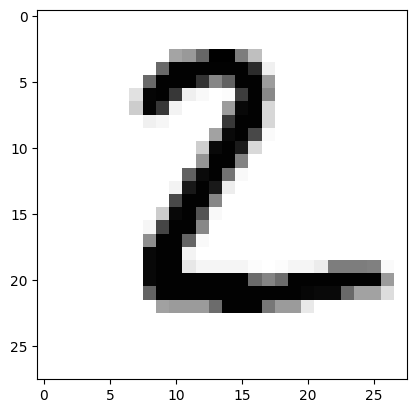

In [51]:
first_test_image = X_test[1, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [55]:
pred = model.predict(X_test[[1], :])

1/1 [==============================] - 0s 27ms/step


In [56]:
# Or you can get the max probability position, that will be the digit
import numpy as np
np.argmax(model.predict(X_test[[2], :]),axis=1)

1/1 [==============================] - 0s 29ms/step


array([1], dtype=int64)